In [1]:
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector

In [20]:
import numpy as np

## Use Nlocal to approximate the 4-qubits parameterized unitaries 

Reference:

https://learn.qiskit.org/course/machine-learning/parameterized-quantum-circuits#parameterized-12-0

https://qiskit.org/documentation/stubs/qiskit.circuit.library.NLocal.html

In [2]:
from qiskit.circuit.library import NLocal

In [5]:
# rotation block:
rot = QuantumCircuit(2)
params = ParameterVector('r', 4)
rot.ry(params[0], 0)
rot.rz(params[0], 0)
rot.ry(params[2], 1)
rot.rz(params[3], 1)

# entanglement block:
ent = QuantumCircuit(3)
params = ParameterVector('e', 3)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 0, 2)

qc_nlocal = NLocal(num_qubits=4, rotation_blocks=rot,
                   entanglement_blocks=ent, entanglement='linear',
                   skip_final_rotation_layer=True, insert_barriers=True)

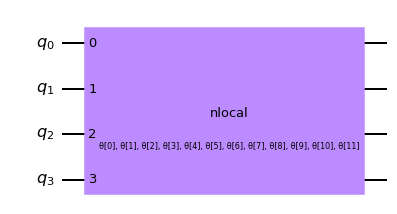

In [6]:
qc_nlocal.draw(output='mpl')

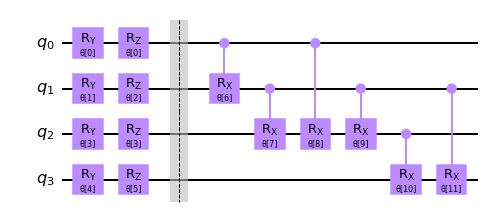

In [7]:
qc_nlocal.decompose().draw(output='mpl')

In [8]:
qc_nlocal.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11])])

In [19]:
len(qc_nlocal.parameters)

12

### Bind with parameters

In [15]:
qc_nlocal.parameters[0]

ParameterVectorElement(θ[0])

In [16]:
theta_0 = qc_nlocal.parameters[0]

In [21]:
initial_point = np.random.random(qc_nlocal.num_parameters)

In [22]:
value_dict = dict(zip(qc_nlocal.parameters, initial_point))

In [23]:
value_dict

{ParameterVectorElement(θ[0]): 0.5853236318563368,
 ParameterVectorElement(θ[1]): 0.5291262441383684,
 ParameterVectorElement(θ[2]): 0.49675805775674553,
 ParameterVectorElement(θ[3]): 0.04038865664232616,
 ParameterVectorElement(θ[4]): 0.036801301565779765,
 ParameterVectorElement(θ[5]): 0.19272290883332022,
 ParameterVectorElement(θ[6]): 0.23984897723115606,
 ParameterVectorElement(θ[7]): 0.2986215578492408,
 ParameterVectorElement(θ[8]): 0.11359350532299006,
 ParameterVectorElement(θ[9]): 0.9051390034330795,
 ParameterVectorElement(θ[10]): 0.8511889819038673,
 ParameterVectorElement(θ[11]): 0.9916474863255789}

In [24]:
qc_nlocal

### Define a wrap-up function to create the approximation circuit

In [29]:
def UnitaryNlocal4(reps=3):
    '''
    A utility function to create a parameterized Nlocal circuit 
    as an approximation of the N-qubits Unitaries
    
    Parameters
    ----------
    reps: Int, default 3
        How often the rotation blocks and entanglement blocks are repeated. 
        Circuit with more layers should have higher expressive power, 
        but might be hard to optimize
        
    Return
    ------
    Qiskit BlueprintCircuit, the Nlocal citcuit
    '''
    # rotation block:
    rot = QuantumCircuit(2)
    params = ParameterVector('r', 4)
    rot.ry(params[0], 0)
    rot.rz(params[0], 0)
    rot.ry(params[2], 1)
    rot.rz(params[3], 1)

    # entanglement block:
    ent = QuantumCircuit(3)
    params = ParameterVector('e', 3)
    ent.crx(params[0], 0, 1)
    ent.crx(params[1], 1, 2)
    ent.crx(params[2], 0, 2)

    qc_nlocal = NLocal(num_qubits=4, rotation_blocks=rot, reps=reps, 
                       entanglement_blocks=ent, entanglement='linear',
                       skip_final_rotation_layer=True, insert_barriers=True)
    
    return qc_nlocal

### Test

In [30]:
U0 = UnitaryNlocal(reps=3, N=4)

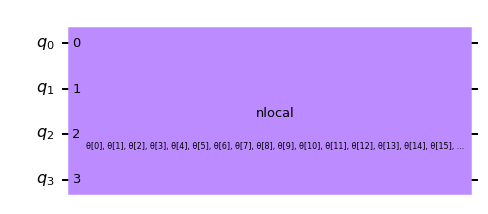

In [31]:
U0.draw(output='mpl')

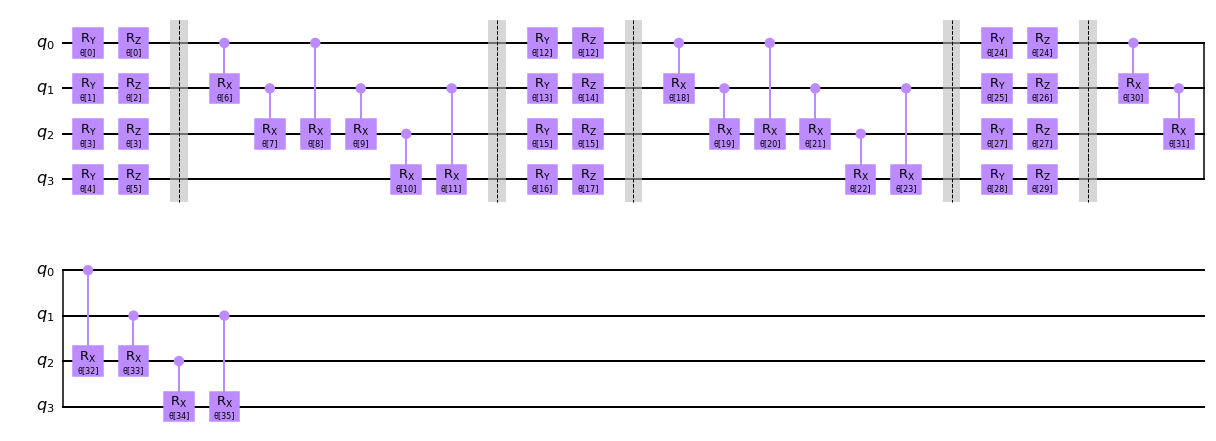

In [32]:
U0.decompose().draw(output='mpl')

### 2-qubit approximation

In [49]:
def UnitaryNlocal2(reps=2):
    '''
    A utility function to create a parameterized Nlocal circuit 
    as an approximation of the 2-qubits Unitaries
    
    Parameters
    ----------
    reps: Int, default 2
        How often the rotation blocks and entanglement blocks are repeated. 
        Circuit with more layers should have higher expressive power, 
        but might be hard to optimize
        
    Return
    ------
    Qiskit BlueprintCircuit, the Nlocal citcuit
    '''
    # rotation block:
    rot = QuantumCircuit(2)
    params = ParameterVector('r', 4)
    rot.ry(params[0], 0)
    rot.rz(params[0], 0)
    rot.ry(params[2], 1)
    rot.rz(params[3], 1)

    # entanglement block:
    ent = QuantumCircuit(2)
    params = ParameterVector('e', 4)
    ent.crx(params[0], 0, 1)
    ent.crx(params[1], 1, 0)
    ent.crx(params[2], 0, 1)
    ent.crx(params[3], 1, 0)

    qc_nlocal = NLocal(num_qubits=2, rotation_blocks=rot,reps=2,
                       entanglement_blocks=ent, entanglement='linear',
                       skip_final_rotation_layer=True, insert_barriers=True)
    return qc_nlocal

In [47]:
# rotation block:
rot = QuantumCircuit(2)
params = ParameterVector('r', 4)
rot.ry(params[0], 0)
rot.rz(params[0], 0)
rot.ry(params[2], 1)
rot.rz(params[3], 1)

# entanglement block:
ent = QuantumCircuit(2)
params = ParameterVector('e', 4)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 0)
ent.crx(params[2], 0, 1)
ent.crx(params[3], 1, 0)

qc_nlocal = NLocal(num_qubits=2, rotation_blocks=rot,reps=2,
                   entanglement_blocks=ent, entanglement='linear',
                   skip_final_rotation_layer=True, insert_barriers=True)

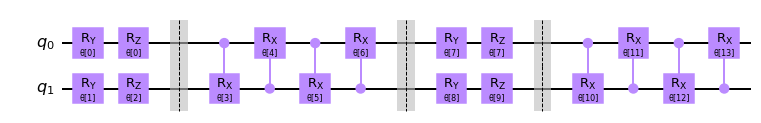

In [48]:
qc_nlocal.decompose().draw(output='mpl')

In [50]:
u2 = UnitaryNlocal2()

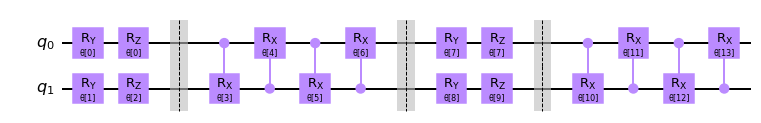

In [51]:
u2.decompose().draw(output='mpl')

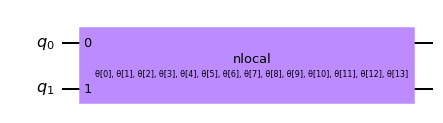

In [53]:
u2.draw(output='mpl')